# **W1D1: Introduction to the Climate System and Xarray**

## Overview

The first three tutorials of today will introduce the basics of gridded, labeled data with [Xarray](https://xarray.dev/). Since Xarray introduces additional abstractions on top of plain arrays of data, our goal is to show why these abstractions are useful and how they frequently lead to simpler, more robust code.

We'll cover these topics:

1. Create a `DataArray`, one of the core object types in Xarray
1. Understand how to use named coordinates and metadata in a `DataArray`
1. Combine individual `DataArrays` into a `Dataset`, the other core object type in Xarray
1. Subset, slice, and interpolate the data using named coordinates
1. Open netCDF data using XArray
1. Basic subsetting and aggregation of a `Dataset`
1. Brief introduction to plotting with Xarray

# **Tutorial 3: Opening and Plotting netCDF Data**

**Week 1, Day 1, Introduction to the Climate System**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Ohad Zivan

**Content editors:** Agustina Pesce

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS


### **Code and Data Sources**

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/xarray-intro.html).

# **Tutorial Objectives**

Many global climate datasets are stored as [NetCDF](https://pro.arcgis.com/en/pro-app/latest/help/data/multidimensional/what-is-netcdf-data.htm) (network Common Data Form) files. NetCDF is a file format for storing multidimensional variables such as temperature, humidity, pressure, wind speed, and direction. 

In this tutorial, we will import atmospheric pressure and temperature data stored in a NetCDF file. We will learn how to use various attributes of XArray to import, analyze, interpret, and plot the data.

In [2]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

# Setup

In [1]:
# !pip install datetime

# !pip install numpy
# !pip install pandas
# !pip install xarray
# !pip install pythia_datasets

In [2]:
from datetime import timedelta

import numpy as np
import pandas as pd
import xarray as xr
from pythia_datasets import DATASETS

In [5]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

ModuleNotFoundError: No module named 'ipywidgets'

# Section 1: Opening netCDF data

Xarray is closely linked with the netCDF data model, and it even treats netCDF as a 'first-class' file format. This means that Xarray can easily open netCDF datasets. However, these datasets need to follow some of Xarray's rules. One such rule is that coordinates must be 1-dimensional.

Here we're getting the data from Project Pythia's custom library of example data, which we already imported above with <code>from pythia_datasets import DATASETS</code>. The <code>DATASETS.fetch()</code> method will automatically download and cache our example data file <code>NARR_19930313_0000.nc</code> locally.

In [3]:
filepath = DATASETS.fetch('NARR_19930313_0000.nc')

Once we have a valid path to a data file that Xarray knows how to read, we can open it like this:

In [4]:
ds = xr.open_dataset(filepath)
ds

<xarray.Dataset>
Dimensions:                       (time1: 1, isobaric1: 29, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
  * isobaric1                     (isobaric1) float32 100.0 125.0 ... 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    LambertConformal_Projection   int32 ...
    lat                           (y, x) float64 ...
    lon                           (y, x) float64 ...
    Geopotential_height_isobaric  (time1, isobaric1, y, x) float32 ...
    v-component_of_wind_isobaric  (time1, isobaric1, y, x) float32 ...
    Temperature_isobaric          (time1, isobaric1, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

What are the dimensions of this dataset?
How many climate variables are in this dataset?

## Section 1.1: Subsetting the `Dataset`

Our call to `xr.open_dataset()` above returned a `Dataset` object that we've decided to call `ds`. We can then pull out individual fields. First, let's assess the `isobaric1` values. Isobaric means characterized by constant or equal pressure. Let's look at the `isobaric1` values:

In [5]:
ds.isobaric1
# Recall that we can also use dictionary syntax like `ds['isobaric1']` to do the same thing

<xarray.DataArray 'isobaric1' (isobaric1: 29)>
array([ 100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,  300.,  350.,
        400.,  450.,  500.,  550.,  600.,  650.,  700.,  725.,  750.,  775.,
        800.,  825.,  850.,  875.,  900.,  925.,  950.,  975., 1000.],
      dtype=float32)
Coordinates:
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03
Attributes:
    units:                   hPa
    long_name:               Isobaric surface
    positive:                down
    Grib_level_type:         100
    _CoordinateAxisType:     Pressure
    _CoordinateZisPositive:  down

The `isobaric1` coordinate contains 29 pressure values (in hPa) corresponding to different pressures of the atmosphere. Recall from the video that pressure decreases higher in the atmosphere. Therefore, we can think about the isobaric pressure values as representing altitude in the atmosphere (i.e., lower atmospheric pressure and high altitudes). For each isobaric pressure value, there is data for all other variables in the dataset at that same pressure level of the atmosphere:
   -  **Wind**: the u and v components of the wind describe the direct of wind movement at a specific level of the atmosphere. The U wind component is parallel to the x-axis (i.e. longitude) and the V wind component is parallel to the y- axis (i.e. latitude). 
   - **Temperature**: temperatures at a specific atmospheric pressure
   - **Geopotential Height**: the height of a given point in the atmosphere in units proportional to the potential energy of unit mass (geopotential) at this height relative to sea level

Let's explore this `Dataset` a bit further.

`Datasets` also support much of the same subsetting operations as `DataArray`, but will perform the operation on all data. Let's subset all data from an atmospheric pressure of 1000 hPa:

In [6]:
ds_1000 = ds.sel(isobaric1=1000.0)
ds_1000

<xarray.Dataset>
Dimensions:                       (time1: 1, y: 119, x: 268)
Coordinates:
  * time1                         (time1) datetime64[ns] 1993-03-13
    isobaric1                     float32 1e+03
  * y                             (y) float32 -3.117e+03 -3.084e+03 ... 714.1
  * x                             (x) float32 -3.324e+03 ... 5.343e+03
Data variables:
    u-component_of_wind_isobaric  (time1, y, x) float32 ...
    LambertConformal_Projection   int32 ...
    lat                           (y, x) float64 ...
    lon                           (y, x) float64 ...
    Geopotential_height_isobaric  (time1, y, x) float32 ...
    v-component_of_wind_isobaric  (time1, y, x) float32 ...
    Temperature_isobaric          (time1, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  North American Regional Reanalysis ...
    GRIB_table_version:                   0,131
    Generating_process_or_model:          North American Regional Reanalysis ...
    Conventions:                          CF-1.6
    history:                              Read using CDM IOSP GribCollection v3
    featureType:                          GRID
    History:                              Translated to CF-1.0 Conventions by...
    geospatial_lat_min:                   10.753308882144761
    geospatial_lat_max:                   46.8308828962289
    geospatial_lon_min:                   -153.88242040519995
    geospatial_lon_max:                   -42.666108129242815

We can further subset to a single `DataArray` to isolate a specific climate measurement. Let's subset temperature from the atmospheric level at which the isobaric pressure if 1000 hPa:

In [7]:
ds_1000.Temperature_isobaric

<xarray.DataArray 'Temperature_isobaric' (time1: 1, y: 119, x: 268)>
[31892 values with dtype=float32]
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
    isobaric1  float32 1e+03
  * y          (y) float32 -3.117e+03 -3.084e+03 -3.052e+03 ... 681.6 714.1
  * x          (x) float32 -3.324e+03 -3.292e+03 ... 5.311e+03 5.343e+03
Attributes:
    long_name:           Temperature @ Isobaric surface
    units:               K
    description:         Temperature
    grid_mapping:        LambertConformal_Projection
    Grib_Variable_Id:    VAR_7-15-131-11_L100
    Grib1_Center:        7
    Grib1_Subcenter:     15
    Grib1_TableVersion:  131
    Grib1_Parameter:     11
    Grib1_Level_Type:    100
    Grib1_Level_Desc:    Isobaric surface

## Section 1.2: Aggregation operations

Not only can you use the named dimensions for manual slicing and indexing of data (as we saw in the last tutorial), but you can also use it to control aggregation operations (e.g., average, sum, standard deviation). Aggregation methods for Xarray objects operate over the named coordinate dimensions specified by keyword argument <code>dim</code>. 

First, let's try calculating the `std` (standard deviation) of the u component of the isobaric wind from our `Dataset`. The following code will calculate the standard devision of all the `u-component_of_wind_isobaric` values at each isobaric level. In other words, we'll end up with one standard deviation value for each of the 29 isobaric levels.

In [8]:
u_winds = ds['u-component_of_wind_isobaric']
u_winds.std(dim=['x', 'y'])

<xarray.DataArray 'u-component_of_wind_isobaric' (time1: 1, isobaric1: 29)>
array([[ 8.673963 , 10.212325 , 11.556413 , 12.254429 , 13.372146 ,
        15.472462 , 16.091969 , 15.846294 , 15.195834 , 13.936979 ,
        12.93888  , 12.060708 , 10.972139 ,  9.722328 ,  8.853286 ,
         8.257241 ,  7.679721 ,  7.4516497,  7.2352104,  7.039894 ,
         6.883371 ,  6.7821493,  6.7088237,  6.6865997,  6.7247376,
         6.745023 ,  6.6859775,  6.5107226,  5.972262 ]], dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03

Side note: Recall that the U wind component is parallel to the x-axis (i.e. longitude) and the V wind component is parallel to the y- axis (i.e. latitude). A positive U wind comes from the west, and a negative U wind comes from the east.  A positive V wind comes from the south, and a negative V wind comes from the north. Which direction are these winds coming from?

Next, let's try calculating the mean of the temperature profile (temperature as a function of pressure) over a specific region. For this exercise, we will calculate the temperature profile over Colorado, USA. For this exercise, the bounds of Colorado are:
 * x: -182km to 424km
 * y: -1450km to -990km
    
It you look back at the values for x and y in our dataset, the units for these values are kilometers (km). The bounds for Colorado correspond to the coordinates 37°N to 41°N and 102°W to 109°W.


In [9]:
temps = ds.Temperature_isobaric
co_temps = temps.sel(x=slice(-182, 424), y=slice(-1450, -990))
prof = co_temps.mean(dim=['x', 'y'])
prof

<xarray.DataArray 'Temperature_isobaric' (time1: 1, isobaric1: 29)>
array([[215.078  , 215.76935, 217.243  , 217.82663, 215.83487, 216.10933,
        219.99902, 224.66118, 228.80576, 234.88701, 238.78503, 242.66309,
        246.44807, 249.26636, 250.84995, 253.37354, 257.0429 , 259.08398,
        260.97955, 262.98364, 264.82138, 266.5198 , 268.22467, 269.7471 ,
        271.18216, 272.66815, 274.13037, 275.54718, 276.97675]],
      dtype=float32)
Coordinates:
  * time1      (time1) datetime64[ns] 1993-03-13
  * isobaric1  (isobaric1) float32 100.0 125.0 150.0 175.0 ... 950.0 975.0 1e+03

# Section 2: Plotting with Xarray

Another major benefit of using labeled data structures is that they enable automated plotting with axis labels. 

## Section 2.1: Simple visualization with `.plot()`

Much like [Pandas](https://foundations.projectpythia.org/core/pandas.html), Xarray includes an interface to [Matplotlib](https://foundations.projectpythia.org/core/matplotlib.html) that we can access through the `.plot()` method of every `DataArray`.

For quick and easy data exploration, we can just call `.plot()` without any modifiers:

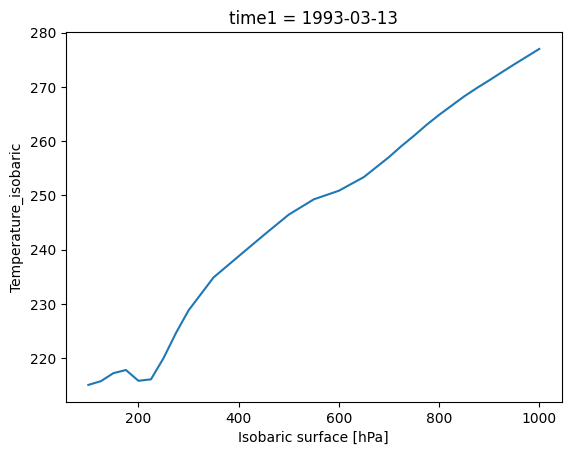

In [11]:
prof.plot()

Here Xarray has generated a line plot of the temperature data against the coordinate variable `isobaric`. Also the metadata are used to auto-generate axis labels and units.

Consider the following questions:
- What isobaric pressure corresponds to Earth's surface?
- How does temperature change with increasing altitude in the atmosphere?

It might be a bit difficult to answer these questions with our current plot, so let's try customizing our figure to present the data clearer.

## Section 2.2: Customizing the plot

As in Pandas, the `.plot()` method is mostly just a wrapper to Matplotlib, so we can customize our plot in familiar ways.

In this air temperature profile example, we would like to make two changes:
- swap the axes so that we have isobaric levels on the y (vertical) axis of the figure (since isobaric levels correspond to altitude)
- make pressure decrease upward in the figure, so that up is up (since pressure decreases with altitude)

We can do this by adding a few keyword arguments to our `.plot()`:

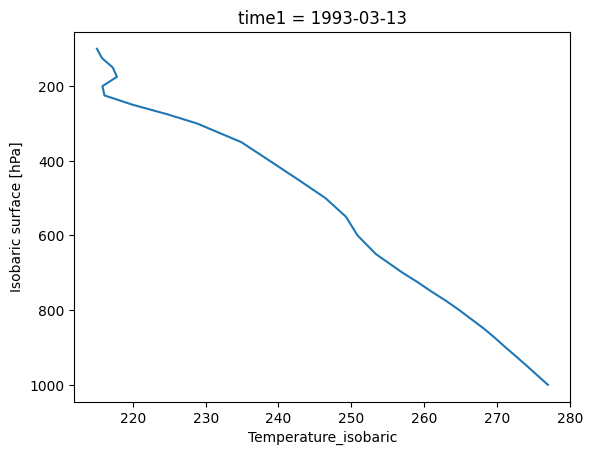

In [12]:
prof.plot(y="isobaric1", yincrease=False)

## Section 2.3: Plotting 2D data

In the example above, the `.plot()` method produced a line plot.

What if we call `.plot()` on a 2D array? Let's try plotting the temperature data from 1000 hPa isobaric level (surface temperature) for all x and y values:

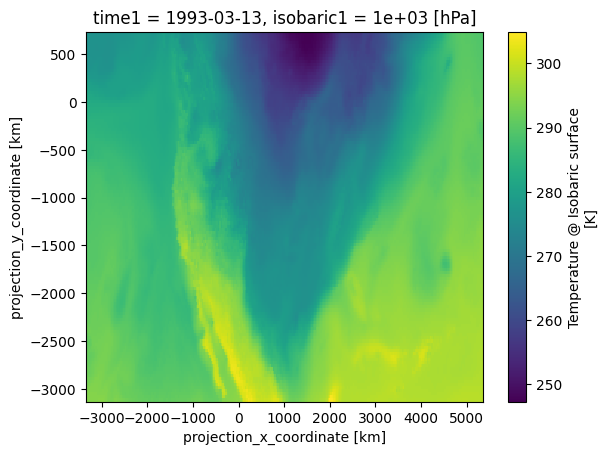

In [13]:
temps.sel(isobaric1=1000).plot()

Xarray has recognized that the `DataArray` object calling the plot method has two coordinate variables, and generates a 2D plot using the `pcolormesh` method from Matplotlib.

In this case, we are looking at air temperatures on the 1000 hPa isobaric surface over North America. We could improve this figure further by using [Cartopy](https://foundations.projectpythia.org/core/cartopy.html) to handle the map projection and geographic features.

# Section 3: Climate Connection

## Question 3.1
Observe the plots you made of temperatre vs. isobaric pressure. Why does the temperature decrease as atmospheric pressure decreases (i.e., at higher altitudes in the atmosphere).

## Question 3.2
The map you made is showing temperature across the United States at the 1000 hPa level of the atmosphere. How do you think temperatures at the 500 hPa level would compare? What might be causing the spatial differences in temperature seen in the map?



In [3]:
# to_remove explanation

"""
1. The decrease in temperature with increasing altitude in the atmosphere is primarily a result of the decreasing air pressure, as dictated by the ideal gas law and the adiabatic cooling effect. According to the ideal gas law, which states that the pressure of a gas is directly proportional to its temperature when the volume and the amount of gas stay the same, the decrease in air pressure at higher altitudes leads to a decrease in temperature. Additionally, as air rises, it expands due to the decrease in pressure, resulting in a drop in temperature due to reduced kinetic energy of the air molecules.
2. In general, we would expect temperatures at the 500 hPa level (which is higher in the atmosphere) to be cooler than temperatures at the 1000 hPa level. The spatial differences in temperature seen in the map could be caused by a variety of factors, including solar radiation received at different latitudes, atmospheric circulation patterns, elevation difference, geographical features like mountains and bodies of water, and human activity. 
"""

'\n1. The decrease in temperature with increasing altitude in the atmosphere is primarily a result of the decreasing air pressure, as dictated by the ideal gas law and the adiabatic cooling effect. According to the ideal gas law, which states that the pressure of a gas is directly proportional to its temperature when the volume and the amount of gas stay the same, the decrease in air pressure at higher altitudes leads to a decrease in temperature. Additionally, as air rises, it expands due to the decrease in pressure, resulting in a drop in temperature due to reduced kinetic energy of the air molecules.\n2. In general, we would expect temperatures at the 500 hPa level (which is higher in the atmosphere) to be cooler than temperatures at the 1000 hPa level. The spatial differences in temperature seen in the map could be caused by a variety of factors, including solar radiation received at different latitudes, atmospheric circulation patterns, elevation difference, geographical features 

# Summary

Xarray brings the joy of Pandas-style labeled data operations to N-dimensional data. As such, it has become a central workhorse in the geoscience community for analyzing of gridded datasets. Xarray allows us to open self-describing NetCDF files and make full use of the coordinate axes, labels, units, and other metadata. By utilizing labeled coordinates, our code becomes simpler to write, easier to read, and more robust.
